# car price prediction with machine learning
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

Business Goal We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new d scenario.

 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [4]:
car=pd.read_csv("Downloads/car data.csv")
car

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


## Agregate Function

In [7]:
print("Maximum values of car::",car.min())

Maximum values of car:: Car_Name               800
Year                  2003
Selling_Price          0.1
Present_Price         0.32
Driven_kms             500
Fuel_Type              CNG
Selling_type        Dealer
Transmission     Automatic
Owner                    0
dtype: object


In [55]:
print("Maximum values of car::",car.max())

Maximum values of car:: Car_Name              xcent
Year                   2018
Selling_Price          35.0
Present_Price          92.6
Driven_kms           500000
Fuel_Type            Petrol
Selling_type     Individual
Transmission         Manual
Owner                     3
dtype: object


In [9]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
car.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [13]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Check NUll values and Duplicates

In [23]:
car.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
296    False
297    False
298    False
299    False
300    False
Length: 301, dtype: bool

In [27]:
car.isnull().values.any()

False

## Data Visualization

Range of years: 2003 to 2018


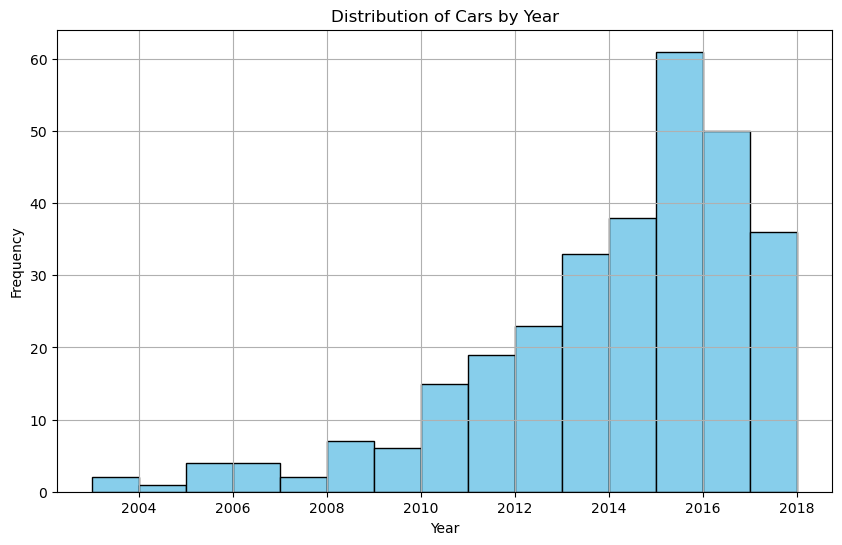

In [31]:
min_year = car['Year'].min()
max_year = car['Year'].max()
print(f"Range of years: {min_year} to {max_year}")
plt.figure(figsize=(10, 6))
plt.hist(car['Year'], bins=range(car['Year'].min(),car['Year'].max() + 1), color='skyblue', edgecolor='black')
plt.title('Distribution of Cars by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

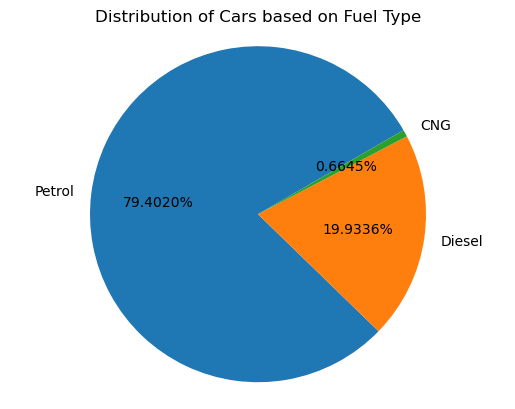

In [93]:
fuel_type_counts = car['Fuel_Type'].value_counts()

# Plotting
plt.pie(fuel_type_counts, labels=fuel_type_counts.index, autopct='%0.4f%%', startangle=30)
plt.axis('equal')  
plt.title('Distribution of Cars based on Fuel Type')
plt.show()

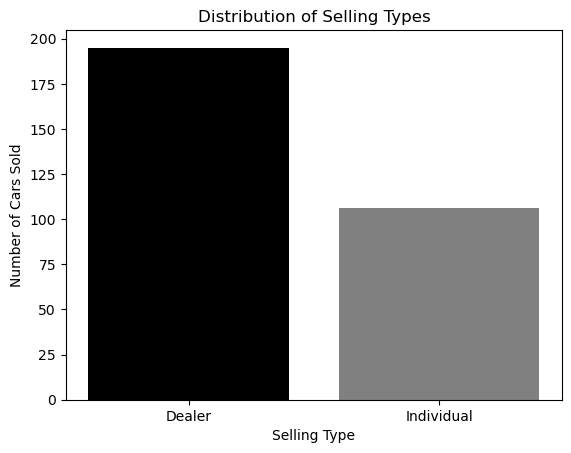

In [73]:
selling_type_counts = car['Selling_type'].value_counts()

plt.bar(selling_type_counts.index, selling_type_counts.values, color=['black', 'gray'])
plt.title('Distribution of Selling Types')
plt.xlabel('Selling Type')
plt.ylabel('Number of Cars Sold')
plt.show()

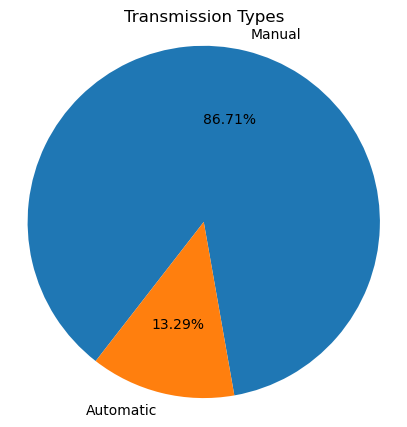

In [91]:
transmission_counts = car['Transmission'].value_counts()

# Plotting the transmission types as a pie chart
plt.figure(figsize=(5, 5))
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%2.2f%%', startangle=280)
plt.title('Transmission Types')
plt.axis('equal')
plt.show()

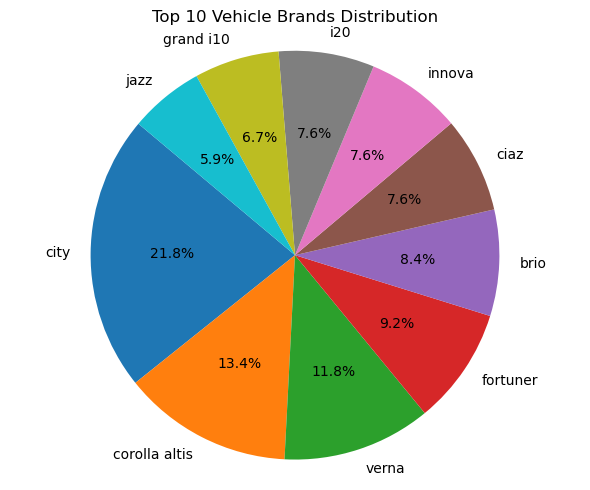

In [107]:
brand_distribution = car['Car_Name'].value_counts()

top_10_brands = brand_distribution.head(10)

# Plotting the pie chart
plt.figure(figsize=(6, 5))
plt.pie(top_10_brands, labels=top_10_brands.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Vehicle Brands Distribution')
plt.axis('equal')  
plt.tight_layout()
plt.show()

## This is how using Data Analysis and Machine Learning technique, we have successfully able to predict the sales.